**Imports and workspace setting**

In [51]:
import csv
import math
import os

import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat

**Loading data and preview**

In [52]:
my_data = pd.read_csv('PSID.csv')
my_data.head()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced
2,3,4,7,33,12.0,8000,693,1,married
3,4,4,173,39,10.0,15000,1904,2,married
4,5,5,2,47,9.0,6500,1683,5,married


**Remove first 3 columns**

In [53]:
my_data = my_data.drop(["Seq No", "intnum", "persnum"], axis=1)
my_data.head()

,age,educatn,earnings,hours,kids,married
0,39,12.0,77250,2940,2,married
1,35,12.0,12000,2040,2,divorced
2,33,12.0,8000,693,1,married
3,39,10.0,15000,1904,2,married
4,47,9.0,6500,1683,5,married


**Describing data set**

In [54]:
print('Data set size = ', my_data.shape)
print('Dimension = ', my_data.ndim)

Data set size =  (4856, 6)
Dimension =  2


In [55]:
my_data.dtypes

age           int64
educatn     float64
earnings      int64
hours         int64
kids          int64
married      object
dtype: object

In [56]:
my_data.describe()

,age,educatn,earnings,hours,kids
count,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,5.595116,18.449502,15985.447449,947.175837,14.887856
min,30.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,12.000000,85.000000,32.000000,1.000000
50%,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,50.000000,99.000000,240000.000000,5160.000000,99.000000


**Handling missing values, fill them with mean of the column.**

In [57]:
## Find columns with NaN values
my_data.isna().any()

age         False
educatn      True
earnings    False
hours       False
kids        False
married     False
dtype: bool

In [58]:
my_data['educatn'] = my_data['educatn'].fillna(my_data['educatn'].mean())
my_data.isna().any()

age         False
educatn     False
earnings    False
hours       False
kids        False
married     False
dtype: bool

**Understanding the distribution of data and find invalid data**

Text(0.5, 0, 'Education level')

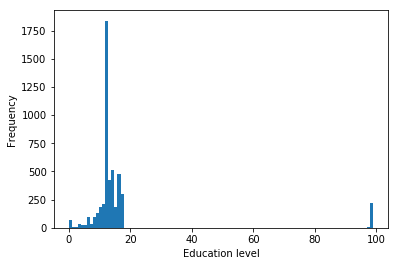

In [59]:
my_data['educatn'].plot(kind='hist', bins=100)
plt.xlabel('Education level')

Text(0.5, 0, 'Number of kids')

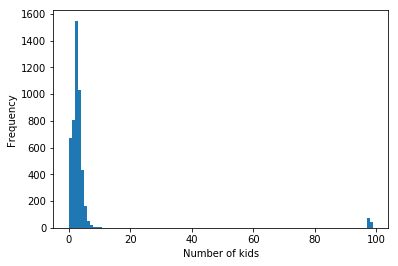

In [60]:
my_data['kids'].plot(kind='hist', bins=100)
plt.xlabel('Number of kids')

Text(0.5, 0, 'Earnings')

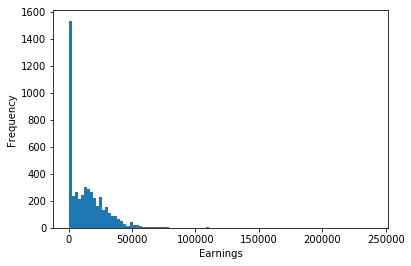

In [61]:
my_data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('Earnings')

Text(0.5, 0, 'Hours')

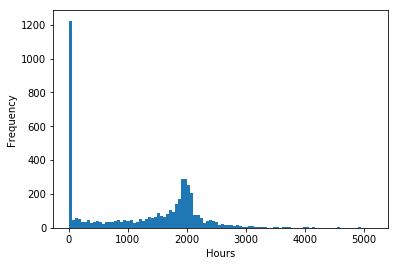

In [62]:
my_data['hours'].plot(kind='hist', bins=100)
plt.xlabel('Hours')

**Remove invalid data (limiting kids <=20 and education <= 20 and earnings <= 150000 and Hours>0)**

Text(0.5, 0, 'Education level')

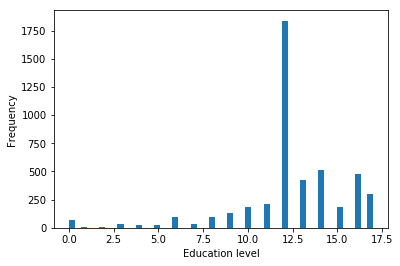

In [63]:
my_data = my_data.drop(my_data[my_data.educatn > 20].index)
my_data['educatn'].plot(kind='hist', bins=50)
plt.xlabel('Education level')

In [64]:
my_data.shape

(4631, 6)

Text(0.5, 0, 'Number of kids')

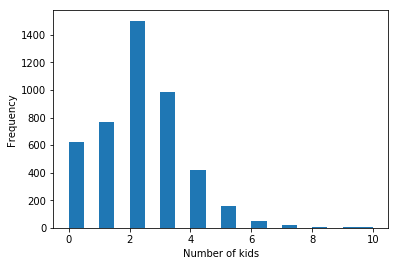

In [65]:
my_data = my_data.drop(my_data[my_data.kids > 20].index)
my_data['kids'].plot(kind='hist', bins=20)
plt.xlabel('Number of kids')

In [66]:
my_data.shape

(4529, 6)

Text(0.5, 0, 'earnings')

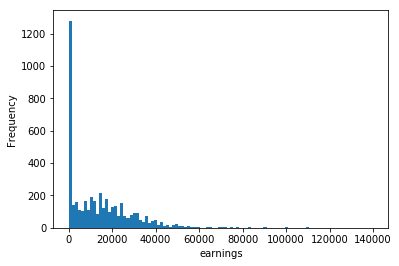

In [67]:
my_data = my_data.drop(my_data[my_data.earnings > 150000].index)
## my_data = my_data.drop(my_data[my_data.earnings == 0].index)
my_data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('earnings')

Text(0.5, 0, 'Hours')

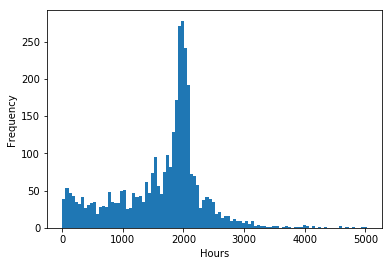

In [68]:
## Removed people who does not work (Hours == 0)
my_data = my_data.drop(my_data[my_data.hours == 0].index)
my_data['hours'].plot(kind='hist', bins=100)
plt.xlabel('Hours')

**Identifying indenpendent and dependent variables**

Text(0, 0.5, 'Hours')

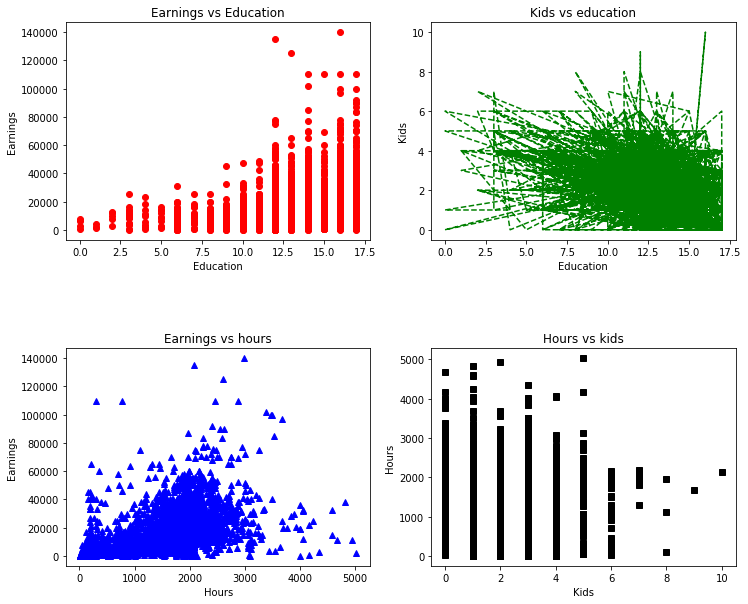

In [69]:
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
plt.plot(my_data['educatn'], my_data['earnings'], 'ro')
plt.title('Earnings vs Education')
plt.xlabel("Education")
plt.ylabel("Earnings")

plt.subplot(2,2,2)
plt.plot(my_data['educatn'], my_data['kids'], 'g--')
plt.title('Kids vs education')
plt.xlabel("Education")
plt.ylabel("Kids")

plt.subplot(2,2,3)
plt.plot(my_data['hours'], my_data['earnings'], 'b^')
plt.title('Earnings vs hours')
plt.xlabel("Hours")
plt.ylabel("Earnings")

plt.subplot(2,2,4)
plt.plot(my_data['kids'], my_data['hours'], 'ks')
plt.title('Hours vs kids')
plt.xlabel("Kids")
plt.ylabel("Hours")

**Identifying correlation between the variables using Pearson's correlation coefficient**

In [70]:
my_data.corr(method='pearson')

,age,educatn,earnings,hours,kids
age,1.000000,-0.011651,0.114818,0.060164,0.155162
educatn,-0.011651,1.000000,0.387013,0.076206,-0.279871
earnings,0.114818,0.387013,1.000000,0.466571,-0.241607
hours,0.060164,0.076206,0.466571,1.000000,-0.116544
kids,0.155162,-0.279871,-0.241607,-0.116544,1.000000


### It can be observed that there is a high(=0.652363) correlation between "earnings" and "hours"

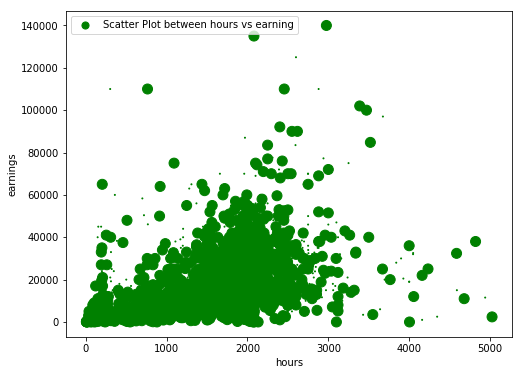

In [71]:
ax = my_data.plot.scatter(x='hours', y='earnings', s=[1,100], c='green', figsize=(8, 6), label='Scatter Plot between hours vs earning')

**Test for normal distribution for variable Hours**

In [72]:
value, p = stat.normaltest(my_data['hours'].sample(50))
print(value, p)
if p >= 0.05:
	print('It is likely that hours is normally distributed.')
else:
	print('It is unlikely that hours is normally distributed.')

2.544250004659255 0.2802354875455114
It is likely that hours is normally distributed.


**Extracting 2 random and equal size samples without replacement**

In [73]:
samplingSize = 1000
hypothesisEarningVal = my_data.earnings.median()
print(hypothesisEarningVal)

highSalaryWorkingHours = my_data[my_data.earnings> hypothesisEarningVal].hours
print("High Salary people count =", highSalaryWorkingHours.count())

lowSalaryWorkingHours = my_data[my_data.earnings<= hypothesisEarningVal].hours
print("Low Salary people count =", lowSalaryWorkingHours.count())

16000.0
High Salary people count = 1707
Low Salary people count = 1762


In [74]:
Hours_of_high_salary = my_data[my_data.earnings> hypothesisEarningVal].hours.sample(samplingSize).sort_values()
Hours_of_high_salary.describe()

count    1000.000000
mean     1952.757000
std       507.419393
min       147.000000
25%      1800.750000
50%      1960.000000
75%      2100.000000
max      4821.000000
Name: hours, dtype: float64

In [75]:
Hours_of_low_salary = my_data[my_data.earnings<= hypothesisEarningVal].hours.sample(samplingSize).sort_values()
Hours_of_low_salary.describe()

count    1000.000000
mean     1350.097000
std       775.601214
min         6.000000
25%       699.250000
50%      1480.000000
75%      1990.250000
max      5025.000000
Name: hours, dtype: float64

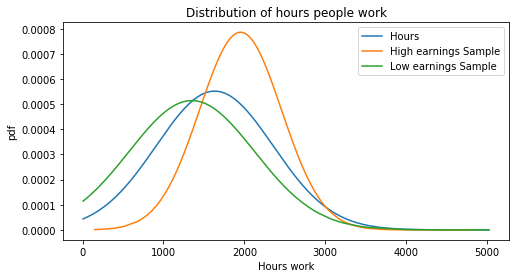

In [76]:
Population = my_data['hours'].sort_values();
PopulationHours = stat.norm.pdf(Population, Population.mean(), Population.std())
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(Population, PopulationHours, label='Hours')

hour_data_fit1 = stat.norm.pdf(Hours_of_high_salary, Hours_of_high_salary.mean(), Hours_of_high_salary.std())
ax.plot(Hours_of_high_salary, hour_data_fit1, label='High earnings Sample')

hour_data_fit2 = stat.norm.pdf(Hours_of_low_salary, Hours_of_low_salary.mean(), Hours_of_low_salary.std())
ax.plot(Hours_of_low_salary, hour_data_fit2, label='Low earnings Sample')

plt.title('Distribution of hours people work')
plt.xlabel('Hours work')
plt.ylabel('pdf')
plt.legend()

**Hypothesis testing : 
Ha = People who get high salary work more hours,
H0 = People with different salaries work same number of hours**

In [77]:
statistics, p = stat.ttest_ind(Hours_of_high_salary, Hours_of_low_salary)
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('People with different salaries work same number of hours (fail to reject H0)')
else:
	print('People who get high salary work more hours (reject H0)')

Statistics=20.562, p=0.000
People who get high salary work more hours (reject H0)
